# Esplorazione e apprendimento automatico per gli annunci Airbnb in Trentino 
## da ottobre 2015 o ottobre 2016

nota:
questo lavoro deriva da [questo script](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Airbnb%20Listing%20Toronto.ipynb) che ha dato vita all'articolo [Exploring Machine Learning for Airbnb listings in Toronto](https://towardsdatascience.com/exploring-machine-learning-for-airbnb-listings-in-toronto-efdbdeba2644)

I dati sono quelli del Trentino di ottobre 2015 raccolti da InsideAirbnb - http://insideairbnb.com/trentino/#


Airbnb non fornisce dati aperti nel senso di database giganteschi o discariche con cui possiamo lavorare. Tuttavia, Inside Airbnb utilizza le informazioni pubbliche raccolte dal sito web di Airbnb e analizza le informazioni disponibili pubblicamente sulle inserzioni di Airbnb di una città, e fornisce filtri e metriche chiave in modo che possiamo vedere come Airbnb viene utilizzato nelle principali città del mondo. Inside Airbnb è un insieme indipendente di strumenti e dati non associati o sostenuti da Airbnb o dai concorrenti di Airbnb.
Tuttavia, le informazioni fornite da Inside Airbnb non saranno sufficienti per noi. Stiamo andando a scaricare i dati da lì per la nostra analisi.

Il lavoro è stato svolto da [Susan Li](https://github.com/susanli2016) sulla città di Toronto e, come descritto nel suo script, questo è un adattamento sui dati del Trentino.

Daremo un'occhiata alle inserzioni e ai calendari di Airbnb e cercheremo di fornire un'analisi esplorativa sulla previsione dei prezzi delle quotazioni, sia per, se lavorassimo ipoteticamente su Airbnb, sia per un consumatore.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_TIME, 'it_IT.UTF-8')
%matplotlib inline

In [2]:
reviews = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/visualisations/reviews.csv')
calendar = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/data/calendar.csv.gz')
listings = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/data/listings.csv.gz')

In [3]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Considero solo quelli in Trentino

In [4]:
listings=listings[listings.host_location.str.contains('Trentino')==True]

ripulisco i nomi delle location

In [5]:
listings['host_location'] = listings['host_location'].str.replace(', Trentino-Alto Adige/Südtirol, Italy', '')


In [6]:
listings['host_location'] = listings['host_location'].str.replace(', Trentino-Alto Adige/South Tyrol, Italy', '')


In [7]:
listings['host_location'] = listings['host_location'].str.replace(', Trentino-Alto Adige, Italy', '')


In [8]:
listings['host_location'] = listings['host_location'].str.replace(", Via Costa Dall' Or, 15 Trentino-Alto Adige, Italy", '')


In [9]:
listings['host_location'] = listings['host_location'].str.replace("Trent", 'Trento')


In [10]:
listings['host_location'] = listings['host_location'].str.replace("Trentoino", 'Trento')


In [11]:
listings['host_location'] = listings['host_location'].str.replace("Trentoo", 'Trento')


In [12]:
listings[listings['host_location']=='Lana'].index[0]

1843

In [13]:
listings=listings[listings.name != 'Lana']

In [14]:
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,4906642,https://www.airbnb.com/rooms/4906642,20151011232639,2015-10-12,"""Appartamento Taramelli""",è composto da 2 stanze da letto (1 quadrupla d...,NaN,è composto da 2 stanze da letto (1 quadrupla d...,none,NaN,...,8.0,f,NaN,NaN,f,flexible,f,f,2,0.28
2,5633570,https://www.airbnb.com/rooms/5633570,20151011232639,2015-10-12,APPARTAMENTO VIA GHIAIE,APPARTAMENTO SEMPLICE MA ALLO STESSO TEMPO CON...,NaN,APPARTAMENTO SEMPLICE MA ALLO STESSO TEMPO CON...,none,NaN,...,9.0,f,NaN,NaN,f,moderate,f,f,4,2.24
3,4568603,https://www.airbnb.com/rooms/4568603,20151011232639,2015-10-12,New apartments in Trento,"Born Komodo short stay apartments, new apartme...",NaN,"Born Komodo short stay apartments, new apartme...",none,NaN,...,9.0,f,NaN,NaN,f,flexible,f,f,9,0.20
5,5234474,https://www.airbnb.com/rooms/5234474,20151011232639,2015-10-12,In the hearth of downtown Trento,Great located and lovely studio in the middle ...,The flat is bright and clean and very centrall...,Great located and lovely studio in the middle ...,none,NaN,...,9.0,f,NaN,NaN,f,flexible,f,f,1,3.04
6,8822531,https://www.airbnb.com/rooms/8822531,20151011232639,2015-10-12,Monolocale in palazzo storico,Accogliente monolocale all'interno di un'antic...,Ubicata a 10 minuti di auto dal centro di Tren...,Accogliente monolocale all'interno di un'antic...,none,"Trento è città d´arte, di storia e d’incontro ...",...,NaN,f,NaN,NaN,f,flexible,f,f,2,NaN
8,7234528,https://www.airbnb.com/rooms/7234528,20151011232639,2015-10-12,The b & b building Malfatti,"The b & b building Malfatti , is located in th...","The large living room , where breakfast is ser...","The b & b building Malfatti , is located in th...",none,NaN,...,10.0,f,NaN,NaN,f,flexible,f,f,4,0.90
9,6026573,https://www.airbnb.com/rooms/6026573,20151011232639,2015-10-12,"B&B Al Nettuno, CentroStoricoTrento","Il nostro b&b è in centro storico,zona strateg...",Tre stanze a tema: terra colori intensi e lett...,"Il nostro b&b è in centro storico,zona strateg...",none,Via Romagnosi è il vialone che dal Castello de...,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
10,6345874,https://www.airbnb.com/rooms/6345874,20151011232639,2015-10-12,B&B al Capitello loc.Cadine-Trento,Situato in casa contadina dei primi '800 inter...,Il B&B è composto da 2 ampie camere. Camera Ri...,Situato in casa contadina dei primi '800 inter...,none,"Siamo nel centro storico di Càdine, tranquilla...",...,NaN,f,NaN,NaN,f,flexible,f,f,2,NaN
11,8515515,https://www.airbnb.com/rooms/8515515,20151011232639,2015-10-12,Appartamento Arcobaleno e giardino,Il nostro b&b offre la possibilità di pernotta...,Il B&B Arcobaleno si trova sulla verde collina...,Il nostro b&b offre la possibilità di pernotta...,none,Il B&B è comodamente raggiungibile dall'autost...,...,NaN,f,NaN,NaN,f,moderate,f,f,2,NaN
12,7122822,https://www.airbnb.com/rooms/7122822,20151011232639,2015-10-12,Triple room just 3km from Trento,"Our Farm Holiday is located in a vineyard, in ...","Our Farm Holiday is located in a vineyard, in ...","Our Farm Holiday is located in a vineyard, in ...",none,NaN,...,10.0,f,NaN,NaN,f,flexible,f,f,3,0.77


# Calendario

Come è il calendario degli host Airbnb in Trentino?


In [15]:
print('Abbiamo', calendar.date.nunique(), 'giorni e', calendar.listing_id.nunique(), 'alloggi univoci nei dati disponibili nel calendario.')

Abbiamo 366 giorni e 1847 alloggi univoci nei dati disponibili nel calendario.


In [16]:
calendar.date.min(), calendar.date.max()

('2015-10-11', '2016-10-10')

I dati del calendario coprono un intervallo di tempo di un anno, vale a dire prezzo e disponibilità giorno per giorno dal 11 ottobre 2015 al 10 ottobre 2016

In [17]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         130856
dtype: int64

In [18]:
calendar.size

2696620

In [19]:
calendar.shape

(674155, 4)

In [20]:
calendar.head()

,listing_id,date,available,price
0,4906642,2015-10-12,f,NaN
1,4906642,2015-10-13,f,NaN
2,4906642,2015-10-14,f,NaN
3,4906642,2015-10-15,f,NaN
4,4906642,2015-10-16,f,NaN


filtro il calendario solo per gli alloggi in Trentino

In [21]:
calendar = calendar.loc[calendar.listing_id.isin(listings.id)]

In [22]:
calendar.price.unique()

array([nan, '$60.00', '$65.00', '$35.00', '$40.00', '$55.00', '$91.00',
       '$41.00', '$99.00', '$79.00', '$199.00', '$189.00', '$89.00',
       '$45.00', '$49.00', '$98.00', '$115.00', '$50.00', '$150.00',
       '$90.00', '$26.00', '$48.00', '$58.00', '$74.00', '$76.00',
       '$136.00', '$102.00', '$81.00', '$100.00', '$69.00', '$159.00',
       '$169.00', '$135.00', '$139.00', '$299.00', '$119.00', '$80.00',
       '$195.00', '$125.00', '$160.00', '$70.00', '$88.00', '$105.00',
       '$43.00', '$23.00', '$20.00', '$28.00', '$30.00', '$38.00',
       '$44.00', '$95.00', '$96.00', '$120.00', '$179.00', '$118.00',
       '$27.00', '$29.00', '$31.00', '$32.00', '$34.00', '$33.00',
       '$75.00', '$129.00', '$78.00', '$25.00', '$22.00', '$24.00',
       '$59.00', '$93.00', '$66.00', '$250.00', '$500.00', '$85.00',
       '$73.00', '$83.00', '$46.00', '$56.00', '$57.00', '$68.00',
       '$64.00', '$53.00', '$62.00', '$140.00', '$290.00', '$660.00',
       '$180.00', '$61.00', '$3

In [23]:
calendar.available.value_counts()

t    283743
f     64467
Name: available, dtype: int64

In [24]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

/home/napo/dev/python_scripts/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


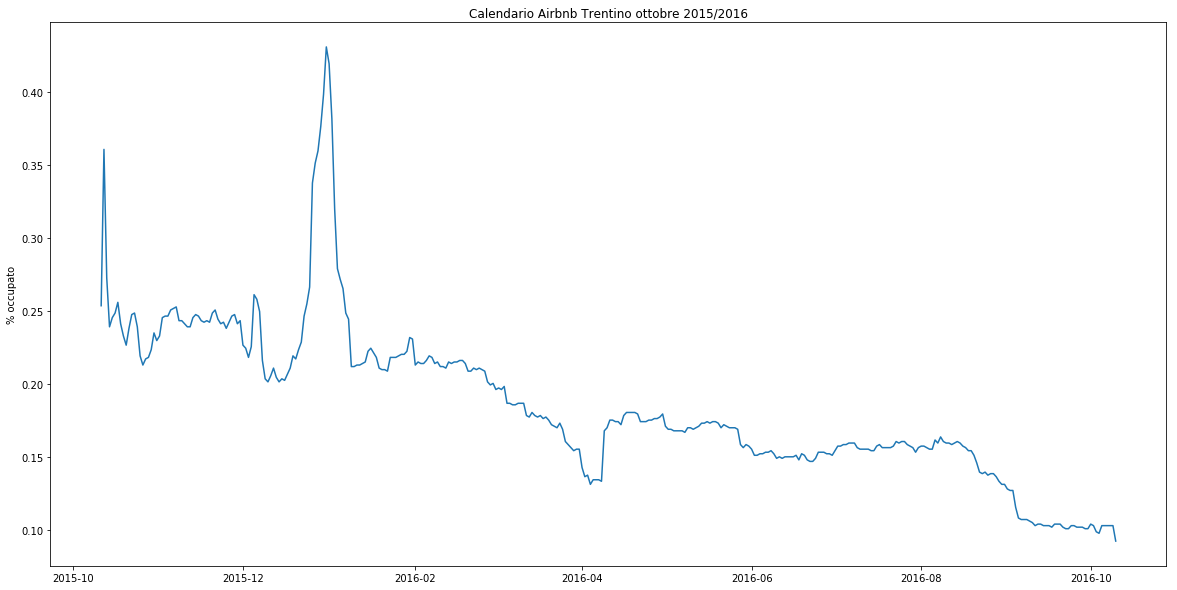

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Calendario Airbnb Trentino ottobre 2015/2016')
plt.ylabel('% occupato')
plt.show();

In [26]:
calendar.head()

,listing_id,date,available,price
0,4906642,2015-10-12,f,NaN
1,4906642,2015-10-13,f,NaN
2,4906642,2015-10-14,f,NaN
3,4906642,2015-10-15,f,NaN
4,4906642,2015-10-16,f,NaN


# Prezzi nel calendario
Come cambiano i prezzi anno dopo mese?

In [27]:
calendar.head()

,listing_id,date,available,price
0,4906642,2015-10-12,f,NaN
1,4906642,2015-10-13,f,NaN
2,4906642,2015-10-14,f,NaN
3,4906642,2015-10-15,f,NaN
4,4906642,2015-10-16,f,NaN


Rimuovere il simbolo "$" nella colonna dei prezzi e conversione a numerico, e conversione della data in tipo datetime.


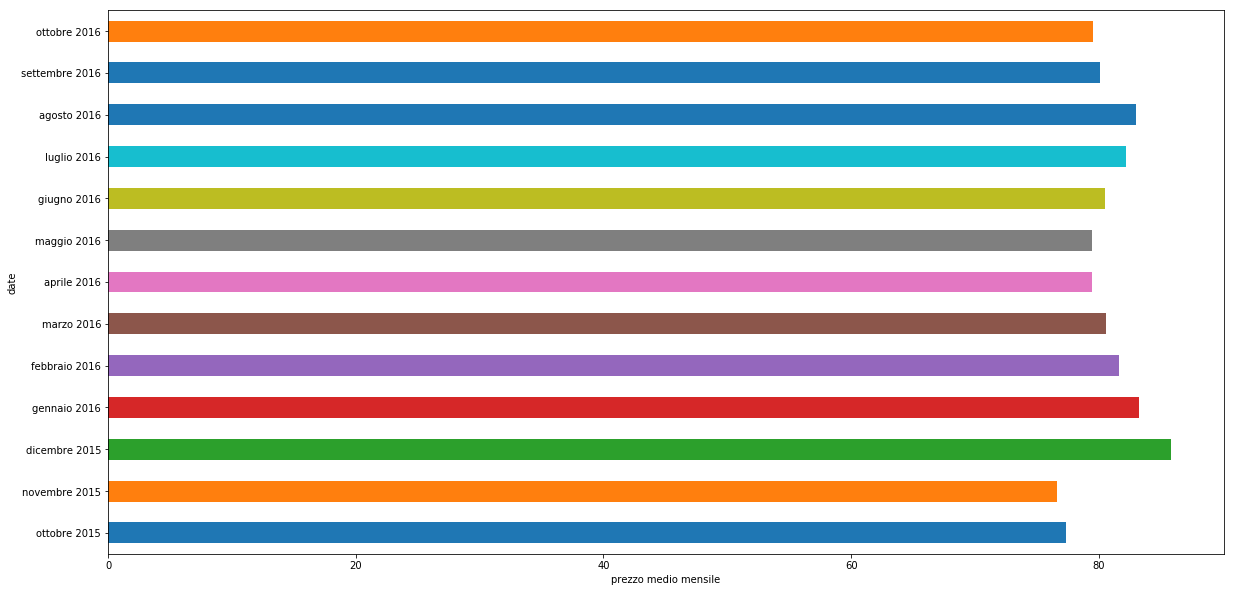

In [28]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B %Y'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (20,10))
plt.xlabel('prezzo medio mensile');

In [29]:
mean_of_month.sort_values(ascending=False)

date
dicembre 2015     85.824962
gennaio 2016      83.277360
agosto 2016       83.013731
luglio 2016       82.193815
febbraio 2016     81.647253
marzo 2016        80.567244
giugno 2016       80.496585
settembre 2016    80.113157
ottobre 2016      79.499138
aprile 2016       79.455603
maggio 2016       79.437543
ottobre 2015      77.346973
novembre 2015     76.620516
Name: price, dtype: float64

Il prezzo di Airbnb in Trentino coincidono con i periodi delle alte stagioni invernali (per prima) ed estive (per seconda).

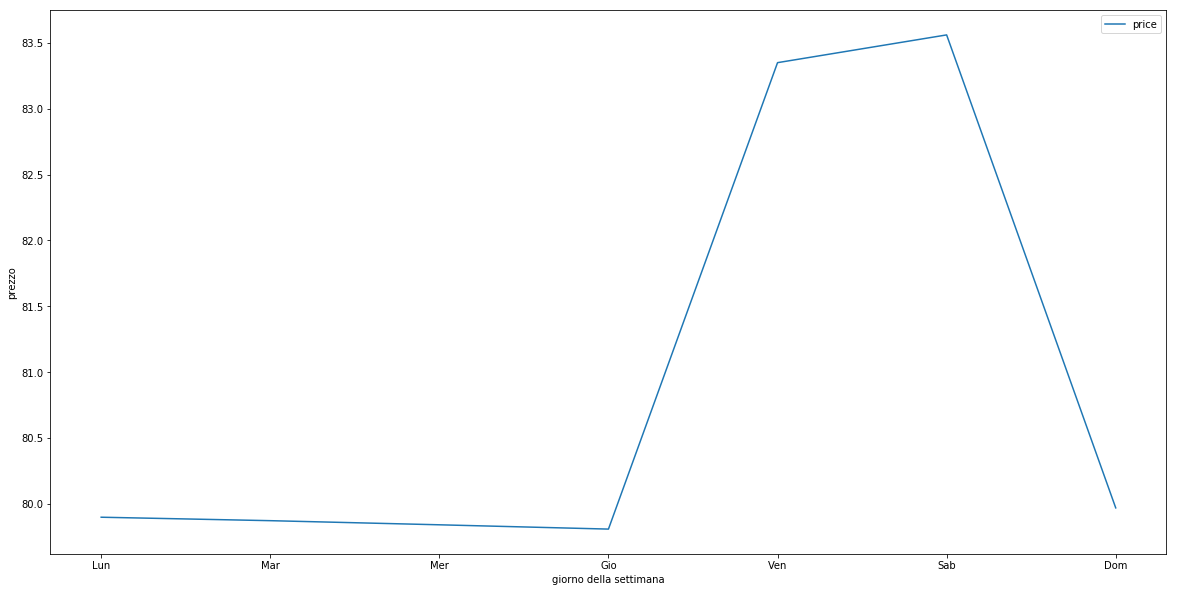

In [30]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot(figsize=(20, 10))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Lun Mar Mer Gio Ven Sab Dom".split()
plt.xlabel('giorno della settimana')
plt.ylabel('prezzo')
plt.xticks(ticks, labels);



venerdì e sabato sono i giorni in cui i prezzi salgono di almeno 4 euro


In [31]:
print('Ci sono', listings.id.nunique(), 'alloggi registrati nel dataset')

Ci sono 954 alloggi registrati nel dataset


In [42]:
listings.host_location.unique()

array(['Trento', 'Folgaria', 'Arco', 'Cunevo', 'Carano', 'Riva del Garda',
       'Dro', 'Bleggio Superiore', 'Ragoli', 'Roncegno', 'Vigo di Fassa',
       'Cavizzana', 'Levico Terme', 'Canazei', 'Ceniga', 'Vigo Lomaso',
       'Pergine Valsugana', 'Bolzano', 'Lavarone', 'Ziano di Fiemme',
       'Andalo', 'Campitello di Fassa', 'Rovereto', 'Cavalese',
       'San Martino di Castrozza', 'Tassullo',
       'Castello-molina di Fiemme', 'Pinzolo', 'Borgo Valsugana',
       'Volano', 'Caldes', 'Cles', 'Tenno', 'Malè', 'Ronzo-chienis',
       'Caldonazzo', 'Brez', 'Molina di Ledro', 'Tesero', 'Stenico',
       'Nago-torbole', 'Tesero - Dolomiti', 'Transacqua',
       "San Michele All'adige", 'Siror', 'Sopramonte', 'Pelugo',
       'Nogaredo', 'Rabbi', 'Vattaro', 'Nago-Torbole', 'Molveno',
       'Daiano', 'Moena', 'Avio', 'Sfruz', 'Folgarida', 'Dimaro', 'Lavis',
       'Mezzolago', 'San Lorenzo in Banale', 'Marilleva 900',
       'Pellizzano', 'Drena', 'Tenna', 'Fiera di Primiero',
       '

In [43]:
listings.groupby(by='host_location').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
host_location,
Trento,193
Riva del Garda,63
Arco,55
Canazei,29
Rovereto,26
Folgaria,23
Nago-torbole,19
Campitello di Fassa,16
Levico Terme,16


Dopo Trento (il Comune più popolato del Trentino) le zone con maggior numero di B&B sono sostanzialmente quelle a più interesse turistico

# punteggio delle recensioni


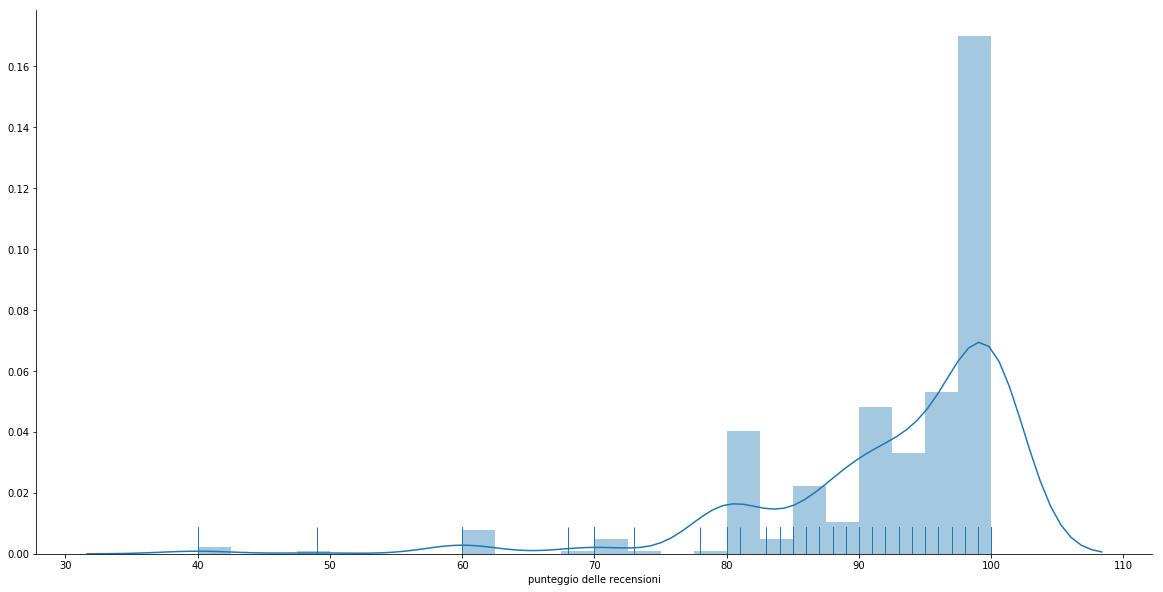

In [44]:
plt.figure(figsize=(20,10))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.xlabel("punteggio delle recensioni")
plt.show();

In [45]:
listings.review_scores_rating.describe()

count    506.000000
mean      92.662055
std        9.683630
min       40.000000
25%       90.000000
50%       96.000000
75%      100.000000
max      100.000000
Name: review_scores_rating, dtype: float64

Come previsto, la maggior parte dei revisori lascia alti punteggi.

# Esplorare i prezzi

i dati sono in dollari, andiamo a convertirli in euro usando il valore di un dollaro in euro al 2015

i dati della Banca d'Italia riportano

*1 dollaro = **1,0887** euro*

https://www.bancaditalia.it/compiti/operazioni-cambi/cambio/cambi_rif_20151231/


In [46]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings['price'] = (listings['price']*1.0887)
listings['price'].describe()

count    954.000000
mean      85.603317
std       54.734927
min       11.975700
25%       54.435000
50%       76.209000
75%      102.065625
max      707.655000
Name: price, dtype: float64

In [47]:
listings['price'].unique()

array([ 65.322 ,  38.1045, 107.7813,  48.9915, 106.6926,  70.7655,
        54.435 , 163.305 ,  97.983 ,  28.3062,  52.2576, 108.87  ,
       146.9745,  87.096 , 212.2965,  43.548 , 125.2005, 174.192 ,
        76.209 ,  95.8056,  21.774 ,  30.4836,  32.661 ,  41.3706,
        59.8785,  47.9028, 128.4666,  29.3949,  81.6525,  84.9186,
        34.8384,  75.1203,  33.7497, 130.644 , 140.4423,  25.0401,
        26.1288,  64.2333,  96.8943,  71.8542,  27.2175, 272.175 ,
       103.4265,  31.5723,  92.5395,  37.0158, 104.5152,  74.0316,
       544.35  ,  19.5966,  82.7412,  11.9757, 141.531 ,  68.5881,
        39.1932,  35.9271,  99.0717,  86.0073,  58.7898,  51.1689,
       114.3135, 155.6841,  45.7254,  78.3864, 326.61  ,  53.3463,
        63.1446,  89.2734, 271.0863,  40.2819, 117.5796, 131.7327,
        93.6282,  50.0802, 105.6039,  17.4192, 152.418 , 123.0231,
        46.8141, 190.5225, 119.757 , 217.74  , 102.3378, 571.5675,
       202.4982, 101.2491,  60.9672,  42.4593, 239.514 ,  91.4

In [48]:
listings['price'].max()

707.655

In [53]:
most_expensive_accommodation= listings[listings.price == listings.price.max()]

In [57]:
most_expensive_accommodation

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1115,2775751,https://www.airbnb.com/rooms/2775751,20151011232639,2015-10-12,UNO CHALET TUTTO PER VOI,Si tratta di uno Chalet che si prende in affit...,"Lo Chalet Maso Doss, unico nel suo genere, è u...",Si tratta di uno Chalet che si prende in affit...,none,"La casa è immersa nella natura, si trova nel P...",...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN


In [63]:
most_expensive_accommodation.host_thumbnail_url.values[0]

'https://a2.muscache.com/ac/users/14195057/profile_pic/1397331895/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70'

l'alloggio Airbnb più costoso del Trentino è di euro 700/ notte.

Il sito era questo https://www.airbnb.com/rooms/2775751 ora non più raggiungibile 

Si trattava dello chalet Maso Doss di Madonna di Campiglio
https://www.chaletcampigliodoss.co.uk/


Rimozione degli alloggi che hanno prezzo superirore a $600/notte, ed anche quelli con prezzo uguale a zero, attraverso i seguenti comandi

In [66]:
listings.loc[listings['price'] > 600]['price'].describe()

count      1.000
mean     707.655
std          NaN
min      707.655
25%      707.655
50%      707.655
75%      707.655
max      707.655
Name: price, dtype: float64

In [67]:
listings.loc[listings['price'] == 0]['price'].count()

0

## Distribuzione dei prezzi degli alloggi dopo aver rimosso i valori anomali

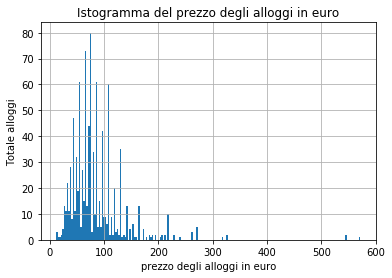

<Figure size 1440x1080 with 0 Axes>

In [68]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Totale alloggi')
plt.xlabel('prezzo degli alloggi in euro')
plt.rcParams["figure.figsize"] = [20,10]
plt.title('Istogramma del prezzo degli alloggi in euro');
plt.figure(figsize=(20, 15))
plt.show()


## aree e prezzi

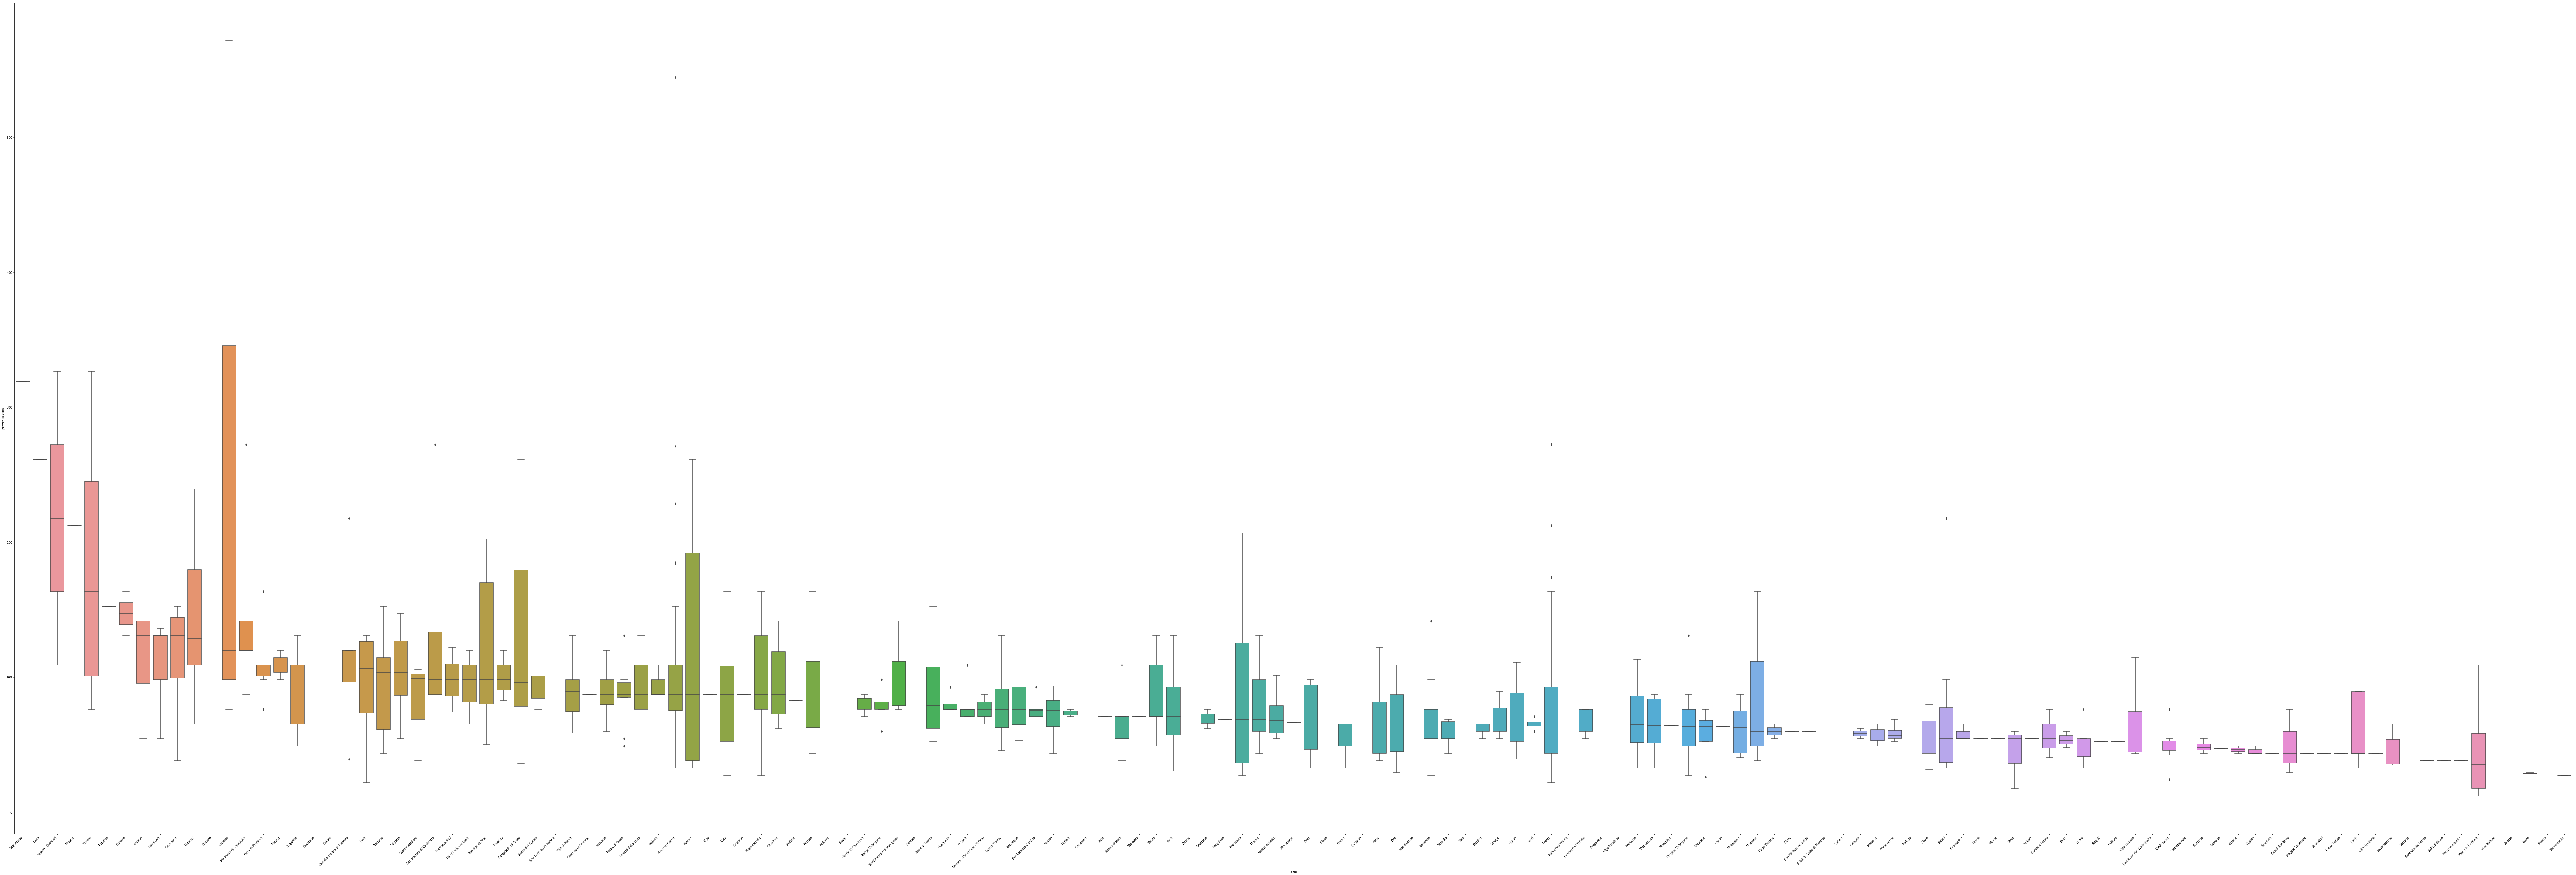

In [74]:

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('host_location')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='host_location', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [50,150]
plt.ylabel('prezzo in euro')
plt.xlabel('area')
plt.show()




i prezzi in trentino sono superiori a Trento

## alloggio - prezzo

In [ ]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel('prezzo in euro')
plt.xlabel('tipo di alloggio')
plt.show();

Quando osserviamo il prezzo medio per ciascun tipo di proprietà, dobbiamo stare attenti a cosa affermiamo perchè dobbiamo prendere in considerazione anche quante sono le varie tipologia (es. Castello sono 6 e Bungalow 1)

In [ ]:
listings.property_type.value_counts()

In [ ]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel('prezzo in euro')
plt.xlabel('tipo di stanza')
plt.show();


Inutile dire che una intera camera / appartamento (apt) ha un prezzo medio molto più alto rispetto agli altri tipi di camera.

In [ ]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('Prezzi degli alloggi in euro');
plt.ylabel('Frequenza')

## Servizi

In [ ]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [ ]:
listings['amenities'].head()

### I 20 servizi più comuni

In [ ]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.rcParams["figure.figsize"] = [20,10]
plt.show();

Interessante: la caratteristica dei servizi sembra avere qualche relazione con il prezzo.

## numero di camere contro prezzo


In [ ]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('prezzo degli alloggi in euro');
plt.ylabel('frequenza')

La maggior parte degli alloggi ha due letti, i prezzi di listino di un letto hanno una gamma molto ampia. Ci sono alloggi che non hanno letti.

In [ ]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('letti');
plt.ylabel('prezzo in euro')
plt.show();

## caratteristiche numeriche
Selezioniamo diverse funzionalità numeriche e proviamo a esplorarle tutte insieme.

In [ ]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
plt.figure(figsize = (20,20))
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

In [ ]:
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (15,15))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

Ci sono alcune informazioni interessanti come quella che il numero di camere da letto e gli ospiti sembrano essere correlati con il prezzo.

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('camere da letto');
plt.ylabel('bagni')
plt.show();


La maggior parte degli alloggi ha una camera da letto e 1 bagno.

In [ ]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('camere da letto');
plt.ylabel('bagni')
plt.show();


Sembra che le inserzioni con 6 camere da letto e 6 bagni abbiano il prezzo medio più alto. Ma dobbiamo essere scettici su questo risultato perché dal grafico sopra riportato, non sappiamo quanti sono gli alloggi in questa categoria.

# Modellazione della proiezione dei prezzi
## Preelaborazione dei dati e calcolo delle caratteristiche

In [ ]:
listings = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/data/listings.csv.gz')

Funzionalità del prezzo di elaborazione. La funzione che modelleremo e predicheremo.

In [ ]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

Matrice di documenti a termine per funzionalità di servizi.

In [ ]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [ ]:
listings.amenities.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

Sostituisci i valori nella seguente funzione a 0 se "f", a 1 se "t".

In [ ]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

Stesso modo per ripulire le altre colonne del valore monetario.

In [ ]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

Le seguenti sono le caratteristiche numeriche che useremo.

In [ ]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]


Riempi i valori mancanti nelle caratteristiche numeriche con la mediana.

In [ ]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

In [ ]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())


Elaborazione delle caratteristiche per categoria 

In [ ]:
for cat_feature in ['zipcode','property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

Aggiunta di funzionalità di servizi

In [ ]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

Pre-elaborazione dei dati e definizione delle categorie completata!

# Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

## Importanza delle caratteristiche secondo Random Forest


In [ ]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

In [ ]:
#t = coefs_df.sort_values('coefs',ascending=False)
#toplot = pd.Series(t, index=x.columns)
#feat_imp.nlargest(20).plot(kind='barh', figsize=(20,10))
#toplot.plot(kind='barh')

Note sui CAP:
- 38066 = Riva del Garda
- 38086 = Madonna di Campiglio / Pinzolo
- 38122 = Trento
- 38068 = Rovereto
- 38067 = Ledro
- 38031 = Capitello di Fassa

## LightGBM

In [ ]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [ ]:
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [ ]:
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)

In [ ]:
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

## Importanza delle caratteristiche secondo LightGBM

In [ ]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(20,10))


Bagni e stanze da letto influenzano il prezzo così come altri valori fra cui anche l'essere a Riva del Garda (38066), Madonna di Campiglio (38086) e Ledro (38067)
